In [9]:
from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

#한글출력을 위한코드
from matplotlib import font_manager, rc
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [36]:
#기계학습 알고리즘 수행단계


#1.데이터로드
X,y=mglearn.datasets.make_forge()

#2.훈련/테스트분할
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

#3.모델선택
clf=KNeighborsClassifier(n_neighbors=3)

#4.훈련기 학습
clf.fit(X_train,y_train)

#5.테스트 데이터 실행
print("테스트 세트 예측:{}".format(clf.predict(X_test)))

#6.성능 확인
print("테스트 세트 정확도:{:.2f}".format(clf.score(X_test,y_test)))

테스트 세트 예측:[1 0 1 0 1 0 0]
테스트 세트 정확도:0.86


X.shape: (26, 2)


C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:102: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


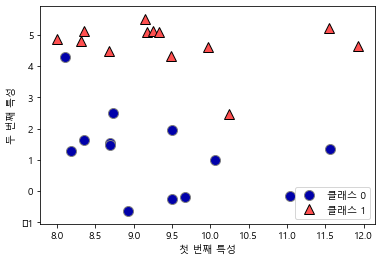

In [10]:
#산점도 그리기
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["클래스 0","클래스 1"],loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:",X.shape)

Text(0, 0.5, '타깃')

C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:102: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


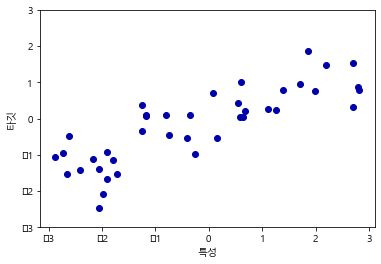

In [11]:
#makewave데이터 만들고 출력하기
X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [13]:
#KNN

#cancer data 판정하기
#목표 : 양성종양, 악성종양 판정

from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))  #키 확인

cancer.keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


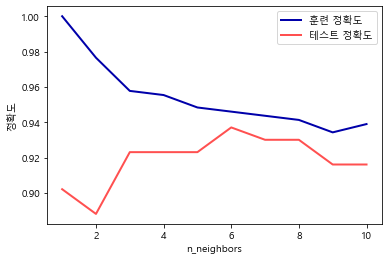

In [21]:
from sklearn.model_selection import train_test_split #train쓸려면 삽입해야
from sklearn.neighbors import KNeighborsClassifier #분류기쓸려면 삽입해야

#훈련/테스트 분할하기
X_train, X_test, y_train, y_test=train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy=[]
test_accuracy=[]

#1에서 10까지 n_neighbors를 적용
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    #모델생성
    clf=KNeighborsClassifier(n_neighbors=n_neighbors) #모델선택 k=1~10
    clf.fit(X_train,y_train) #훈련기 학습
    #훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train,y_train))
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

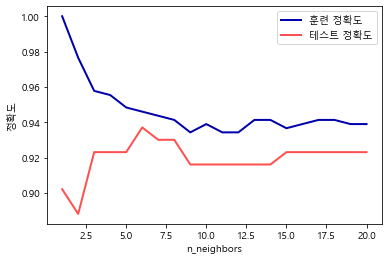

In [24]:
from sklearn.model_selection import train_test_split #train쓸려면 삽입해야
from sklearn.neighbors import KNeighborsClassifier #분류기쓸려면 삽입해야

X_train, X_test, y_train, y_test=train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy=[]
test_accuracy=[]

#1에서 20까지 n_neighbors를 적용
neighbors_settings=range(1,21)

for n_neighbors in neighbors_settings:
    #모델생성
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    #훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train,y_train))
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

#위의 이웃수가 10개일때와 비교하였을때 k를 올린다고 해서 
#더이상 정확도가 상승하지 않는다.

#따라서 너무작은값, 큰값도 아닌 적절한k값을 찾는것이 중요하다.
#이는 k를 바꾸어 가며 test해보면 알 수 있다.
#이 test에서는 k=6일때 가장 정확도가 높았다.